In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
dfRL = pd.read_csv("gas_prod.csv")
dfRL

,Month,Gas_prod
0,1,384.261096
1,2,380.107310
2,3,392.967363
3,4,402.114680
4,5,393.519639
...,...,...
235,236,395.379147
236,237,395.330980
237,238,396.520100
238,239,391.428054


<div align="center"><b>1. Generate a plot of the monthly gas production with proper labels. Paste a screenshot in the Word
document. (5) Once you have read the csv data, before moving to any other step, use the following
code to convert the “Month” column to a proper date column of equal monthly intervals</b></div>

In [4]:
# Convert Month's to Date
start_dateRL = '2004-01'
dfRL['DateRL']= pd.date_range(start=start_dateRL, periods=len(dfRL), freq='M')
dfRL

C:\Users\riley\AppData\Local\Temp\ipykernel_24536\2290598814.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfRL['DateRL']= pd.date_range(start=start_dateRL, periods=len(dfRL), freq='M')


,Month,Gas_prod,DateRL
0,1,384.261096,2004-01-31
1,2,380.107310,2004-02-29
2,3,392.967363,2004-03-31
3,4,402.114680,2004-04-30
4,5,393.519639,2004-05-31
...,...,...,...
235,236,395.379147,2023-08-31
236,237,395.330980,2023-09-30
237,238,396.520100,2023-10-31
238,239,391.428054,2023-11-30


In [5]:
# Convert to timeseries
# Convert data to time series
gas_prod_rl = pd.Series(dfRL.Gas_prod.values, dfRL.DateRL, name='Gas_prod_RL')
gas_prod_rl

DateRL
2004-01-31    384.261096
2004-02-29    380.107310
2004-03-31    392.967363
2004-04-30    402.114680
2004-05-31    393.519639
                 ...    
2023-08-31    395.379147
2023-09-30    395.330980
2023-10-31    396.520100
2023-11-30    391.428054
2023-12-31    400.000000
Name: Gas_prod_RL, Length: 240, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

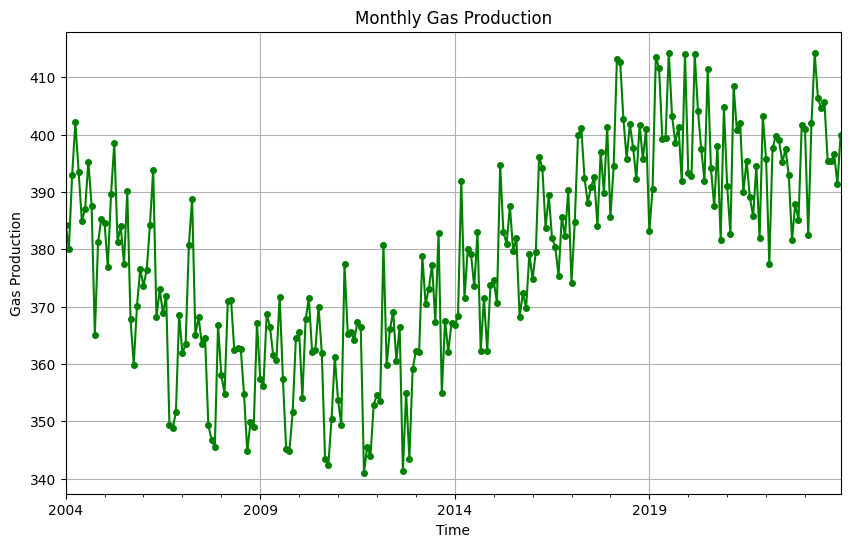

In [6]:
# Create a graph showing monthly gas production. 
ax = gas_prod_rl.plot(figsize=(10, 6), color='green', linestyle='-', marker='o', markersize=4)
ax.set_xlabel('Time')
ax.set_ylabel('Gas Production')
ax.set_title('Monthly Gas Production')
ax.grid(True)
plt.show

<div align="center"><b>(2.) Split the data into training and validation sets. Use the last three years of data for the validation set and the remaining as the training set. Run the following forecast models. </b></div>

<div align="center"><b>a. Linear Trend </b></div>

In [7]:
# Partiotion Data for time series
# Keep the last thrre years as the validation set
nValidRL = 36
nTrainRL = len(gas_prod_rl) - nValidRL
train_tsRL = gas_prod_rl[:nTrainRL]
valid_tsRL = gas_prod_rl[nTrainRL:]

In [8]:
# Linear Trend Time Series Model 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
ts_dfRL = tsatools.add_trend(gas_prod_rl, trend='ct')
ts_dfRL['Month']=ts_dfRL.index.month

ts_dfRL

,Gas_prod_RL,const,trend,Month
DateRL,,,,
2004-01-31,384.261096,1.0,1.0,1
2004-02-29,380.107310,1.0,2.0,2
2004-03-31,392.967363,1.0,3.0,3
2004-04-30,402.114680,1.0,4.0,4
2004-05-31,393.519639,1.0,5.0,5
...,...,...,...,...
2023-08-31,395.379147,1.0,236.0,8
2023-09-30,395.330980,1.0,237.0,9
2023-10-31,396.520100,1.0,238.0,10


In [9]:
# parition data drame into training and validation and run regression
nValid = 36
nTrain = len(gas_prod_rl) - nValid
train_dfRL = ts_dfRL[:nTrain]
valid_dfRL = ts_dfRL[nTrain:]


In [10]:
# fit linear reg model
gas_lmRL = sm.ols(formula='Gas_prod_RL ~ trend', data=train_dfRL).fit()

gas_lmRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gas_prod_RL   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     70.15
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           9.15e-15
Time:                        22:50:53   Log-Likelihood:                -845.41
No. Observations:                 204   AIC:                             1695.
Df Residuals:                     202   BIC:                             1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.1673      2.155    167.108      0.000     355.918     364.417
trend          0.1527      0.018      8.376      0.000       0.117       0.189
==============================================================================
Omnibus:                        2.009   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.957
Skew:                           0.169   Prob(JB):                        0.376
Kurtosis:                       2.660   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:

# Evaluate Model3 performance
# pip install dmba
from dmba import regressionSummary
predict_lmRL = gas_lmRL.predict(valid_dfRL)
regressionSummary(valid_tsRL, predict_lmRL)


Regression statistics

                      Mean Error (ME) : 1.1510
       Root Mean Squared Error (RMSE) : 8.2360
            Mean Absolute Error (MAE) : 6.7058
          Mean Percentage Error (MPE) : 0.2482
Mean Absolute Percentage Error (MAPE) : 1.6962


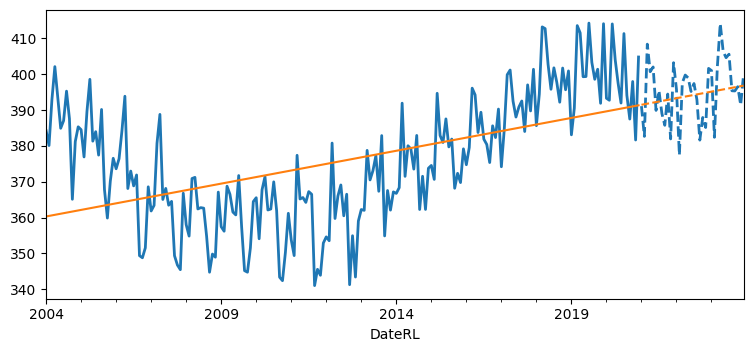

In [12]:
# Visulize Model1
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2)
valid_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2, linestyle='dashed')
gas_lmRL.predict(train_dfRL).plot(color='C1')
gas_lmRL.predict(valid_dfRL).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

<div align="center"><b>Polynomial (just want to investigate)</b></div>

In [13]:
# Model 2 polynomial trend time series model
gas_lm_polyRL = sm.ols(formula= 'Gas_prod_RL ~ trend + np.square(trend) + np.power(trend,3)',
data = train_dfRL).fit()
gas_lm_polyRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gas_prod_RL   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.38e-54
Time:                        22:50:54   Log-Likelihood:                -748.58
No. Observations:                 204   AIC:                             1505.
Df Residuals:                     200   BIC:                             1518.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            398.2342      2.735    145.599      0.000     392.841     403.628
trend                 -1.3388      0.115    -11.615      0.000      -1.566      -1.111
np.square(trend)       0.0129      0.001      9.882      0.000       0.010       0.015
np.power(trend, 3) -3.051e-05   4.18e-06     -7.290      0.000   -3.88e-05   -2.23e-05
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.461
Skew:                          -0.006   Prob(JB):                        0.794
Kurtosis:                       2.768   Cond. No.                     1.32e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# evaluate model2 performance
predict_lm_polyRL = gas_lm_polyRL.predict(valid_dfRL)
regressionSummary(valid_tsRL, predict_lm_polyRL)


Regression statistics

                      Mean Error (ME) : -6.5971
       Root Mean Squared Error (RMSE) : 11.1109
            Mean Absolute Error (MAE) : 8.6976
          Mean Percentage Error (MPE) : -1.7171
Mean Absolute Percentage Error (MAPE) : 2.2312


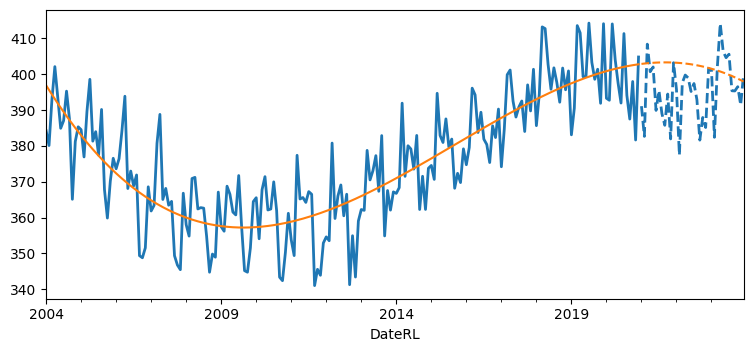

In [15]:
# Visulize Model 2 
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2)
valid_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2, linestyle='dashed')
gas_lm_polyRL.predict(train_dfRL).plot(color='C1')
gas_lm_polyRL.predict(valid_dfRL).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

<div align="center"><b>b. Seasonality</b></div>

In [16]:
# Model 3 Seasonality
gas_lm_seasonRL = sm.ols(formula='Gas_prod_RL~C(Month)', data=train_dfRL).fit()
gas_lm_seasonRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gas_prod_RL   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3.781
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.41e-05
Time:                        22:50:54   Log-Likelihood:                -855.82
No. Observations:                 204   AIC:                             1736.
Df Residuals:                     192   BIC:                             1775.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        371.0753      4.015     92.431      0.000     363.157     378.994
C(Month)[T.2]     -0.0141      5.678     -0.002      0.998     -11.212      11.184
C(Month)[T.3]     18.0605      5.678      3.181      0.002       6.862      29.259
C(Month)[T.4]     15.1649      5.678      2.671      0.008       3.967      26.363
C(Month)[T.5]      7.4953      5.678      1.320      0.188      -3.703      18.694
C(Month)[T.6]      7.6185      5.678      1.342      0.181      -3.580      18.817
C(Month)[T.7]      8.3115      5.678      1.464      0.145      -2.887      19.510
C(Month)[T.8]      8.0284      5.678      1.414      0.159      -3.170      19.227
C(Month)[T.9]     -6.7881      5.678     -1.196      0.233     -17.987       4.410
C(Month)[T.10]    -3.2364      5.678     -0.570      0.569     -14.435       7.962
C(Month)[T.11]    -5.0732      5.678     -0.894      0.373     -16.272       6.125
C(Month)[T.12]     7.3717      5.678      1.298      0.196      -3.827      18.570
==============================================================================
Omnibus:                       35.363   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.109
Skew:                           0.343   Prob(JB):                      0.00235
Kurtosis:                       2.024   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
predict_lm_seasonRL = gas_lm_seasonRL.predict(valid_dfRL)
regressionSummary(valid_tsRL, predict_lm_seasonRL)


Regression statistics

                      Mean Error (ME) : 19.4764
       Root Mean Squared Error (RMSE) : 20.5194
            Mean Absolute Error (MAE) : 19.4764
          Mean Percentage Error (MPE) : 4.9112
Mean Absolute Percentage Error (MAPE) : 4.9112


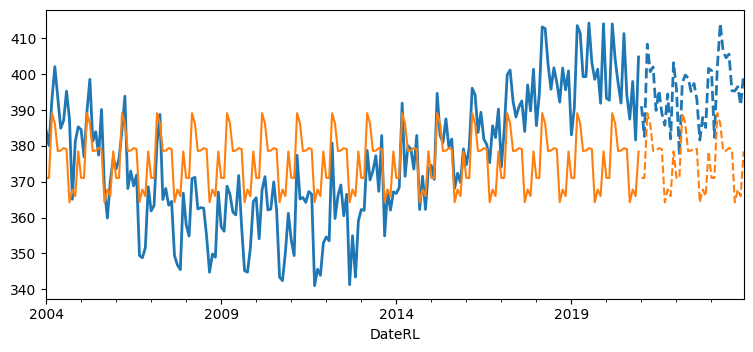

In [18]:
# Visulize Model 3 
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2)
valid_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2, linestyle='dashed')
gas_lm_seasonRL.predict(train_dfRL).plot(color='C1')
gas_lm_seasonRL.predict(valid_dfRL).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

<div align="center"><b>c. Quadratic & Seasonality</b></div>

In [19]:
# model 4 quadratic + seasonality
modelformulaRL = 'Gas_prod_RL ~ trend + np.square(trend) + C(Month)'
gas_lm_trendseasonRL = sm.ols(formula=modelformulaRL, data=train_dfRL).fit()
gas_lm_trendseasonRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gas_prod_RL   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     68.90
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.35e-64
Time:                        22:50:55   Log-Likelihood:                -698.03
No. Observations:                 204   AIC:                             1424.
Df Residuals:                     190   BIC:                             1471.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          380.6398      2.395    158.952      0.000     375.916     385.363
C(Month)[T.2]       -0.1348      2.633     -0.051      0.959      -5.329       5.060
C(Month)[T.3]       17.8120      2.634      6.764      0.000      12.617      23.007
C(Month)[T.4]       14.7816      2.634      5.613      0.000       9.587      19.977
C(Month)[T.5]        6.9702      2.634      2.647      0.009       1.775      12.165
C(Month)[T.6]        6.9445      2.634      2.637      0.009       1.749      12.140
C(Month)[T.7]        7.4816      2.634      2.840      0.005       2.286      12.677
C(Month)[T.8]        7.0355      2.634      2.671      0.008       1.839      12.232
C(Month)[T.9]       -7.9509      2.634     -3.018      0.003     -13.148      -2.754
C(Month)[T.10]      -4.5763      2.635     -1.737      0.084      -9.773       0.621
C(Month)[T.11]      -6.5971      2.635     -2.504      0.013     -11.795      -1.399
C(Month)[T.12]       5.6568      2.635      2.146      0.033       0.458      10.855
trend               -0.5650      0.037    -15.401      0.000      -0.637      -0.493
np.square(trend)     0.0035      0.000     20.291      0.000       0.003       0.004
==============================================================================
Omnibus:                        1.515   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.321
Skew:                          -0.196   Prob(JB):                        0.517
Kurtosis:                       3.050   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# evaluate model performance
predict_lm_seasonRL = gas_lm_trendseasonRL.predict(valid_dfRL)
regressionSummary(valid_tsRL, predict_lm_seasonRL)


Regression statistics

                      Mean Error (ME) : -38.0559
       Root Mean Squared Error (RMSE) : 39.1968
            Mean Absolute Error (MAE) : 38.0559
          Mean Percentage Error (MPE) : -9.6359
Mean Absolute Percentage Error (MAPE) : 9.6359


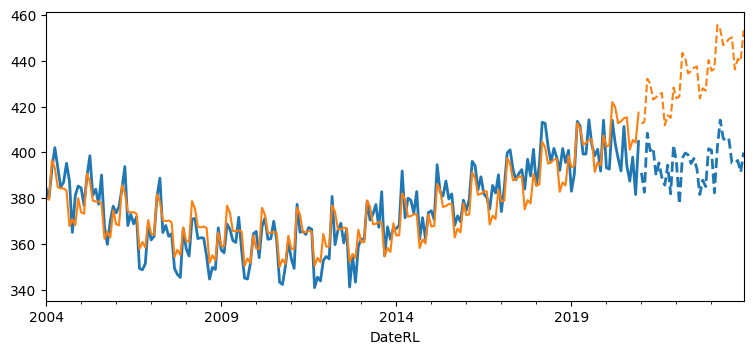

In [21]:
# Visulize Model 4
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2)
valid_dfRL.plot(y='Gas_prod_RL',ax=ax,color='C0',linewidth=2, linestyle='dashed')
gas_lm_trendseasonRL.predict(train_dfRL).plot(color='C1')
gas_lm_trendseasonRL.predict(valid_dfRL).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

<div align="center"><b>4. Take the gas_prod for any 12 consecutive months from the dataset. In the Word document, show in a table the original gas_prod values, a simple moving average forecast with 6-month rolling period, and an exponential smoothing forecast with alpha=0.2. (5)</b></div>

In [22]:
# Compute Simple Moving Averate for 12 months
dfRL['SMA_6'] = dfRL['Gas_prod'].rolling(window=6).mean()

# Compute ES and set smoohting factor alpha to 0.2
dfRL['ES_0.2'] = dfRL['Gas_prod'].ewm(alpha=0.2, adjust=False).mean()

# show the dataset with new columns
dfRL[['Gas_prod', 'SMA_6', 'ES_0.2']].tail()

,Gas_prod,SMA_6,ES_0.2
235,395.379147,404.673264,400.340140
236,395.330980,403.563036,399.338308
237,396.520100,400.625618,398.774667
238,391.428054,398.141716,397.305344
239,400.000000,397.373326,397.844275


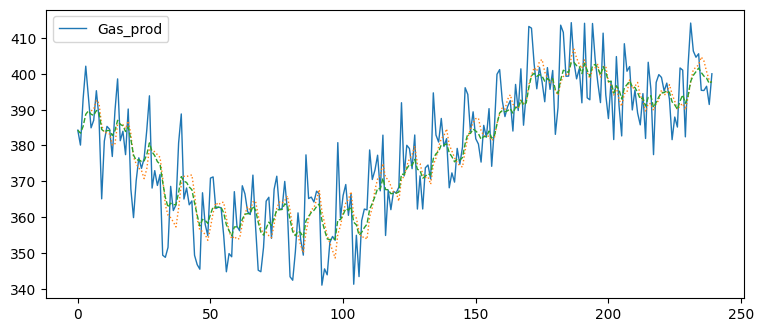

In [23]:
# Visualize moving average forecase
x =dfRL["SMA_6"].dropna()
y = dfRL["ES_0.2"]

# blue line for X 
# orange line for y
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
dfRL.plot(y='Gas_prod', ax=ax,color='C0', linewidth=1)
x.plot(y='SMA_6',ax=ax,color='C1',linewidth=1, linestyle='dotted')
y.plot(y='ES_0.2',ax=ax,color='C2',linewidth=1, linestyle='dashed')
plt.show()

<div align="center"><b>5. Build and run a forecasting model using SARIMA. Explain the process of choosing the values for p, d, and q for the SARIMA model (Use ACF and PACF plots; Do not use the automated search algorithm to pick the best SARIMA parameters). Write a paragraph commenting on the SARIMA results, including the model performance and the AR and MA parameters. (15)</b></div>

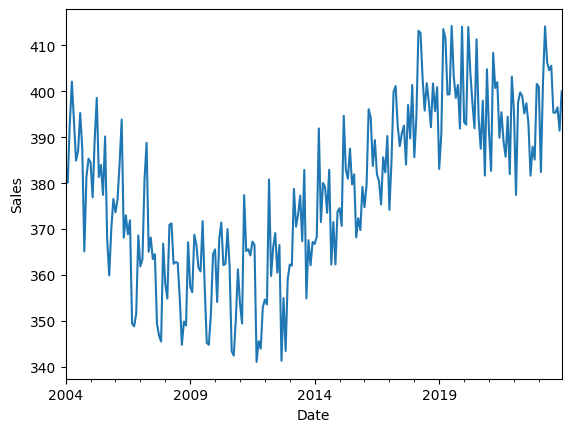

In [24]:
# Reshow time series 
import matplotlib.pylab as plt
ax = gas_prod_rl.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.show()

In [25]:
# Dickey-Fuller Test to verify whether a time-series is stationary
# Null hypothesis: Series is non-stationary
# p-vlaue: non-significance indicating non-stationary
# Test Statistic > Critical Value: Reject null hypothesis and conclude Series is stationary

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(gas_prod_rl.values[1:],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#lags used', 'Number of observations Used'])

for key , value in dftest[4].items(): dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.664424
p-value                          0.855751
#lags used                      15.000000
Number of observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


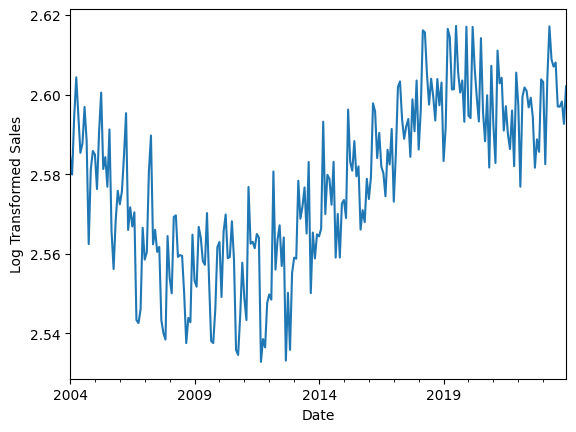

In [26]:
# Log transformation to achieve constant variance
import numpy as np
gas_prod_logrl = np.log10(gas_prod_rl)
ax = gas_prod_logrl.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Log Transformed Sales')
plt.show()

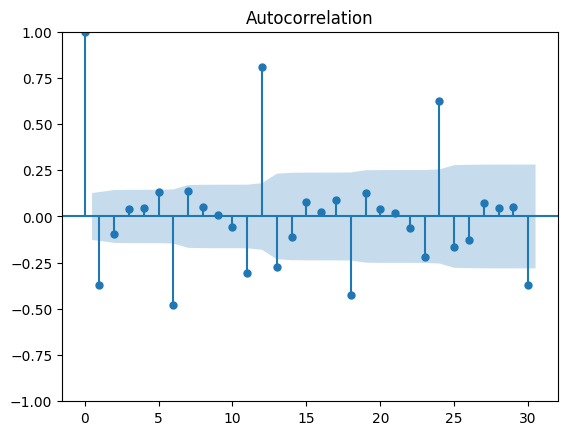

In [27]:
# Plot ACF to check potential seasonality
import statsmodels.tsa.api as smt
gas_ts_log_diffRL = gas_prod_logrl.diff(periods= 1)
gas_ts_log_diffRL.dropna(inplace=True)
smt.graphics.plot_acf(gas_ts_log_diffRL, lags=30, alpha= 0.05)
plt.show()

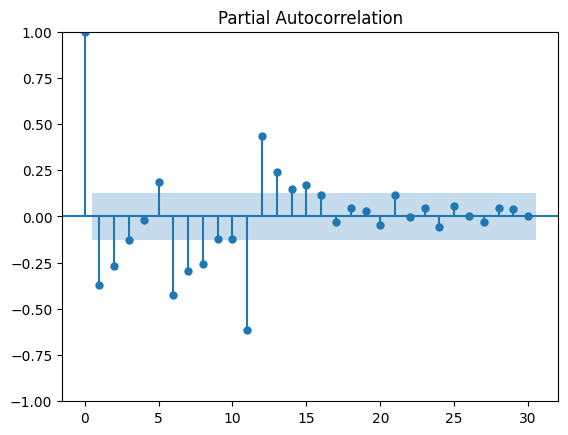

In [28]:
# Partical ACF Plot
smt.graphics.plot_pacf(gas_ts_log_diffRL, lags=30, alpha= 0.05)
plt.show()

In [29]:
# Data partition for the time series data
nValid = 36
nTrain = len(gas_prod_logrl) - nValid
train_tsRL1 = gas_prod_logrl[:nTrain]
valid_tsRL1 = gas_prod_logrl[nTrain:]

In [39]:
# Test a SARIMA model
import statsmodels.api as sm
temp_model = sm.tsa.statespace.SARIMAX(train_tsRL1,
                                       order=(1,1,1),
                                       seasonal_order=(1,1,1,12),
                                       enforce_stationarity=True,
                                       enforce_invertibility=True)
results = temp_model.fit()
print(results.summary())

c:\Users\riley\Documents\programming_directory\6211_Advance_BA\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\riley\Documents\programming_directory\6211_Advance_BA\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Gas_prod_RL   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 706.760
Date:                            Mon, 22 Apr 2024   AIC                          -1403.520
Time:                                    23:02:35   BIC                          -1387.258
Sample:                                01-31-2004   HQIC                         -1396.933
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1359      0.121     -1.125      0.260      -0.373       0.101
ma.L1         -0.5516      0.104   

c:\Users\riley\Documents\programming_directory\6211_Advance_BA\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted values:
2021-01-31    2.588034
2021-02-28    2.587560
2021-03-31    2.607268
2021-04-30    2.598239
2021-05-31    2.592083
2021-06-30    2.586884
2021-07-31    2.604855
2021-08-31    2.588954
2021-09-30    2.582632
2021-10-31    2.592530
2021-11-30    2.576961
2021-12-31    2.598921
2022-01-31    2.582403
2022-02-28    2.581995
2022-03-31    2.598947
2022-04-30    2.591181
2022-05-31    2.585886
2022-06-30    2.581413
2022-07-31    2.596871
2022-08-31    2.583194
2022-09-30    2.577757
2022-10-31    2.586270
2022-11-30    2.572878
2022-12-31    2.591768
2023-01-31    2.577559
2023-02-28    2.577208
2023-03-31    2.591790
2023-04-30    2.585110
2023-05-31    2.580555
2023-06-30    2.576708
2023-07-31    2.590004
2023-08-31    2.578240
2023-09-30    2.573563
2023-10-31    2.580886
2023-11-30    2.569367
2023-12-31    2.585614
Freq: ME, Name: predicted_mean, dtype: float64

95% confidence intervals:
            lower Gas_prod_RL  upper Gas_prod_RL
2021-01-31           2.574128 

c:\Users\riley\Documents\programming_directory\6211_Advance_BA\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


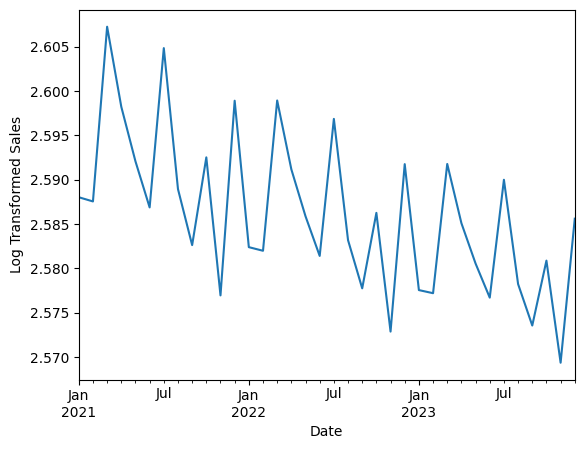

In [35]:
# forecast with the fitted model
predRL = results.get_forecast(steps=36,alpha=0.05)

# Get the forecasted values
forecasted_values = predRL.predicted_mean

# Get the confidence intervals for the forecasted values
confidence_intervals = predRL.conf_int()

# Print the forecasted values
print("Forecasted values:")
print(forecasted_values)

# Print the confidence intervals
print("\n95% confidence intervals:")
print(confidence_intervals)

ax = predRL.predicted_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Log Transformed Sales')
plt.show()

In [38]:
from dmba import regressionSummary
regressionSummary(np.power(10,valid_tsRL1),
                  np.power(10,predRL.predicted_mean))


Regression statistics

                      Mean Error (ME) : 9.5887
       Root Mean Squared Error (RMSE) : 13.0935
            Mean Absolute Error (MAE) : 10.4689
          Mean Percentage Error (MPE) : 2.3986
Mean Absolute Percentage Error (MAPE) : 2.6261
